<a href="https://colab.research.google.com/github/hanifabd/Short-Term-Rain-Prediction/blob/main/Rain_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rain Prediction - Solver Society G5**
This project was made using upper air data from the University of Wyoming website containing the atmosphere lability index data. Additional data was taken from the BMKG aviation meteorology API, which reported in half-hourly intervals by the regional meteorological station studied at Hasanuddin Makassar airport regarding the rain occurrence.

## **About Project**
*   This project aims to build a Machine Learning algorithm to predict rainfall for IYKRA Solver Society's study purposes only.
*   The data processed was taken from the University of Wyoming website for the upper air atmosphere lability index, and BMKG aviation meteorology API for the rainfall occurrences.
*   For the next development, suggested to input several feature such as physical numerical models, satellite images and radar image for better modelling purposes.

## **Data Acquisition**
URL = https://solversociety-rainprediction.herokuapp.com/dataset

In [ ]:
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
import pandas as pd

In [ ]:
url = 'https://solversociety-rainprediction.herokuapp.com/dataset'
html = urlopen(url)
data = bs(html, 'html.parser')

In [ ]:
table = data.find('table', {'class':'table table-bordered table-striped table-sm table-dark mb-0'})

In [ ]:
rows = table.findAll('tr')
rows = rows[1:]

In [ ]:
rain_dataset = []
for row in rows:
  rain_data =[]
  for col in row.findAll(['th','td']):
    col_data = col.get_text().strip()
    rain_data.append(col_data)
  rain_dataset.append(rain_data)

In [ ]:
columns = rain_dataset[0]
values = rain_dataset[1:]

df_rain = pd.DataFrame(values, columns=columns)
df_rain.tail(5)

,convective_available_potential_energy,k_index,cross_totals_index,vertical_totals_index,lifted_index,showalter_index,temp_1000_hpa,dewpoint_1000_hpa,temp_850_hpa,dewpoint_850_hpa,temp_700_hpa,dewpoint_700_hpa,temp_500_hpa,dewpoint_500_hpa,rain
2539,236.4,34.5,21.5,23.3,-2.26,-0.49,25.0,22.2,17.0,15.2,9.6,5.6,-6.3,-8.3,0
2540,706.46,30.5,19.1,23.3,-2.39,1.2,25.4,22.1,18.4,14.2,11.6,4.6,-4.9,-8.4,0
2541,706.46,30.5,19.1,23.3,-2.39,1.2,25.4,22.1,18.4,14.2,11.6,4.6,-4.9,-8.4,1
2542,119.45,32.4,18.8,23.7,-0.87,1.38,26.2,21.2,18.6,13.7,11.2,6.2,-5.1,10.0,0
2543,119.45,32.4,18.8,23.7,-0.87,1.38,26.2,21.2,18.6,13.7,11.2,6.2,-5.1,10.0,1


In [ ]:
df_rain.to_csv('/content/drive/MyDrive/Data Science/Self Project/Rain Prediction/rain_dataset.csv', index=False)

## **Import Library**

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## **Exploratory Data Analysis**

### Data Sample

In [ ]:
df_rain = pd.read_csv('/content/drive/MyDrive/Data Science/Self Project/Rain Prediction/rain_dataset.csv')

In [ ]:
df_rain

,convective_available_potential_energy,k_index,cross_totals_index,vertical_totals_index,lifted_index,showalter_index,temp_1000_hpa,dewpoint_1000_hpa,temp_850_hpa,dewpoint_850_hpa,temp_700_hpa,dewpoint_700_hpa,temp_500_hpa,dewpoint_500_hpa,rain
0,508.22,35.4,20.1,22.9,-1.48,0.16,27.0,22.2,18.6,15.8,10.2,6.9,-4.3,11.3,0
1,508.22,35.4,20.1,22.9,-1.48,0.16,27.0,22.2,18.6,15.8,10.2,6.9,-4.3,11.3,0
2,952.96,32.2,19.2,22.1,-2.35,1.33,26.2,23.5,18.0,15.1,11.0,6.0,-4.1,26.1,0
3,952.96,32.2,19.2,22.1,-2.35,1.33,26.2,23.5,18.0,15.1,11.0,6.0,-4.1,26.1,0
4,276.15,33.7,17.1,23.1,-0.87,2.82,26.2,22.1,19.0,13.0,9.0,6.6,-4.1,34.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,236.40,34.5,21.5,23.3,-2.26,-0.49,25.0,22.2,17.0,15.2,9.6,5.6,-6.3,-8.3,0
2540,706.46,30.5,19.1,23.3,-2.39,1.20,25.4,22.1,18.4,14.2,11.6,4.6,-4.9,-8.4,0
2541,706.46,30.5,19.1,23.3,-2.39,1.20,25.4,22.1,18.4,14.2,11.6,4.6,-4.9,-8.4,1
2542,119.45,32.4,18.8,23.7,-0.87,1.38,26.2,21.2,18.6,13.7,11.2,6.2,-5.1,10.0,0


### Data Information

In [ ]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   convective_available_potential_energy  2544 non-null   float64
 1   k_index                                2544 non-null   float64
 2   cross_totals_index                     2544 non-null   float64
 3   vertical_totals_index                  2544 non-null   float64
 4   lifted_index                           2544 non-null   float64
 5   showalter_index                        2544 non-null   float64
 6   temp_1000_hpa                          2544 non-null   float64
 7   dewpoint_1000_hpa                      2544 non-null   float64
 8   temp_850_hpa                           2544 non-null   float64
 9   dewpoint_850_hpa                       2544 non-null   float64
 10  temp_700_hpa                           2544 non-null   float64
 11  dewp

### Univariate Analysis

#### Missing Value Identification

In [ ]:
df_rain.isna().any()

convective_available_potential_energy    False
k_index                                  False
cross_totals_index                       False
vertical_totals_index                    False
lifted_index                             False
showalter_index                          False
temp_1000_hpa                            False
dewpoint_1000_hpa                        False
temp_850_hpa                             False
dewpoint_850_hpa                         False
temp_700_hpa                             False
dewpoint_700_hpa                         False
temp_500_hpa                             False
dewpoint_500_hpa                         False
rain                                     False
dtype: bool

#### Duplicated Data Identification

In [ ]:
duplicated_df = df_rain[df_rain.duplicated()]
print(df_rain.shape)
print(duplicated_df.shape)

(2544, 15)
(881, 15)


In [ ]:
df_rain = df_rain.drop_duplicates(keep='last')
df_rain = df_rain.reset_index(drop=True)
df_rain

,convective_available_potential_energy,k_index,cross_totals_index,vertical_totals_index,lifted_index,showalter_index,temp_1000_hpa,dewpoint_1000_hpa,temp_850_hpa,dewpoint_850_hpa,temp_700_hpa,dewpoint_700_hpa,temp_500_hpa,dewpoint_500_hpa,rain
0,508.22,35.4,20.1,22.9,-1.48,0.16,27.0,22.2,18.6,15.8,10.2,6.9,-4.3,11.3,0
1,952.96,32.2,19.2,22.1,-2.35,1.33,26.2,23.5,18.0,15.1,11.0,6.0,-4.1,26.1,0
2,276.15,33.7,17.1,23.1,-0.87,2.82,26.2,22.1,19.0,13.0,9.0,6.6,-4.1,34.1,0
3,938.36,18.0,19.6,22.7,-2.06,0.75,26.8,23.1,18.4,15.3,10.2,-9.8,-4.3,36.3,0
4,135.81,21.1,16.3,23.3,0.16,3.59,26.6,20.6,18.8,11.8,10.4,-3.6,-4.5,36.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,236.40,34.5,21.5,23.3,-2.26,-0.49,25.0,22.2,17.0,15.2,9.6,5.6,-6.3,-8.3,0
1659,706.46,30.5,19.1,23.3,-2.39,1.20,25.4,22.1,18.4,14.2,11.6,4.6,-4.9,-8.4,0
1660,706.46,30.5,19.1,23.3,-2.39,1.20,25.4,22.1,18.4,14.2,11.6,4.6,-4.9,-8.4,1
1661,119.45,32.4,18.8,23.7,-0.87,1.38,26.2,21.2,18.6,13.7,11.2,6.2,-5.1,10.0,0


#### Outliers Identification

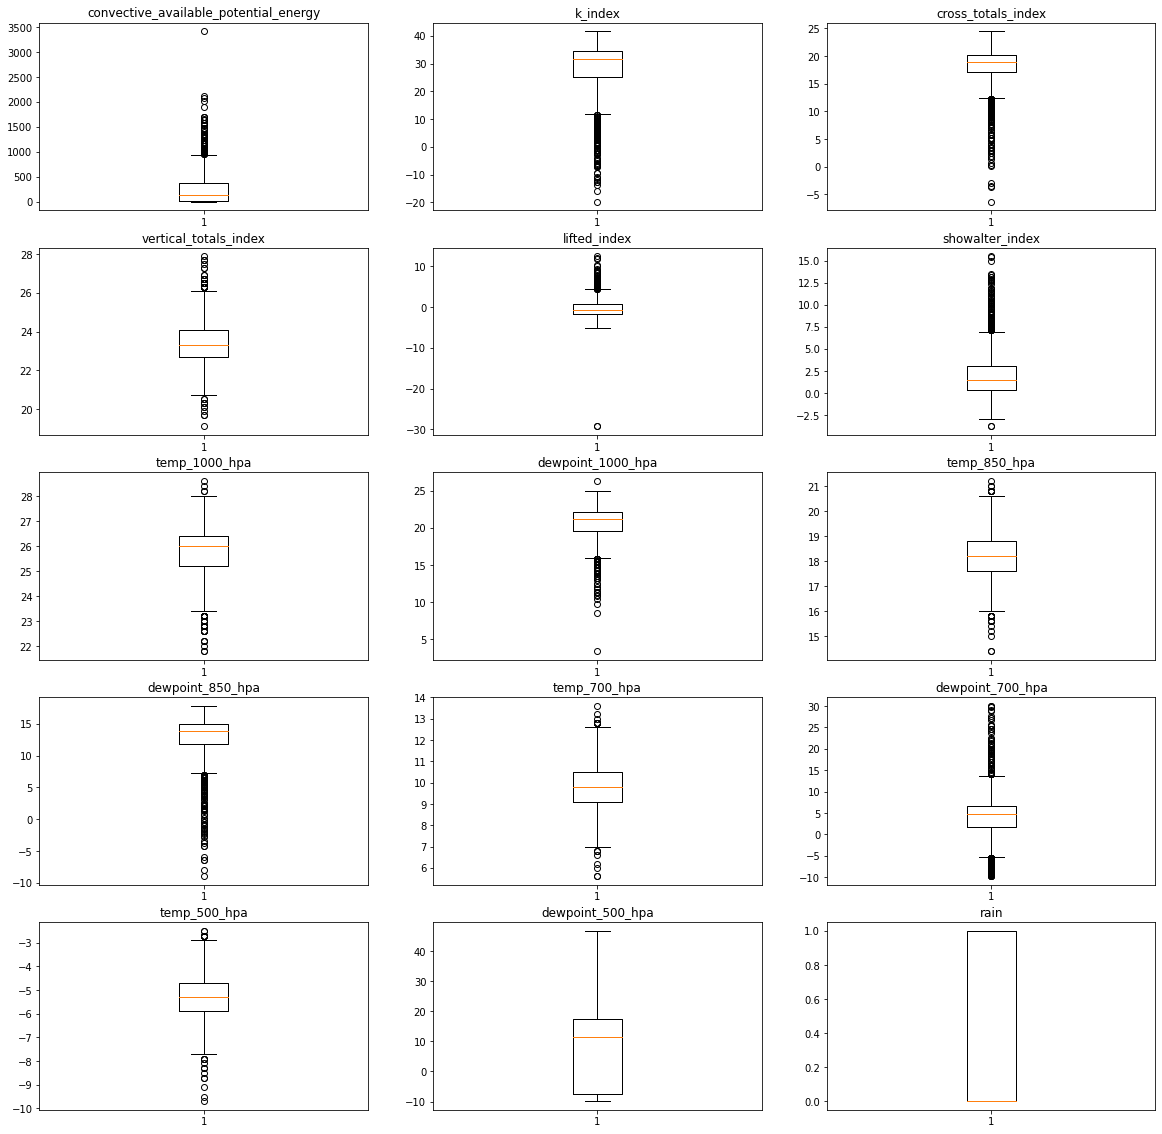

In [ ]:
fig, ax = plt.subplots(5, 3, figsize=(20,20))

var = df_rain.columns
var_index = 0
for row in range(5):
  for col in range(3):
    ax[row][col].boxplot(df_rain[var[var_index]])
    ax[row][col].title.set_text(var[var_index])
    # print('{},{} -> {}'.format(row, col, var[var_index]))
    var_index += 1
plt.show()

In [ ]:
zscore = stats.zscore(df_rain)
df_rain = df_rain[(np.abs(zscore) < 3).all(axis=1)]
df_rain = df_rain.reset_index(drop=True)

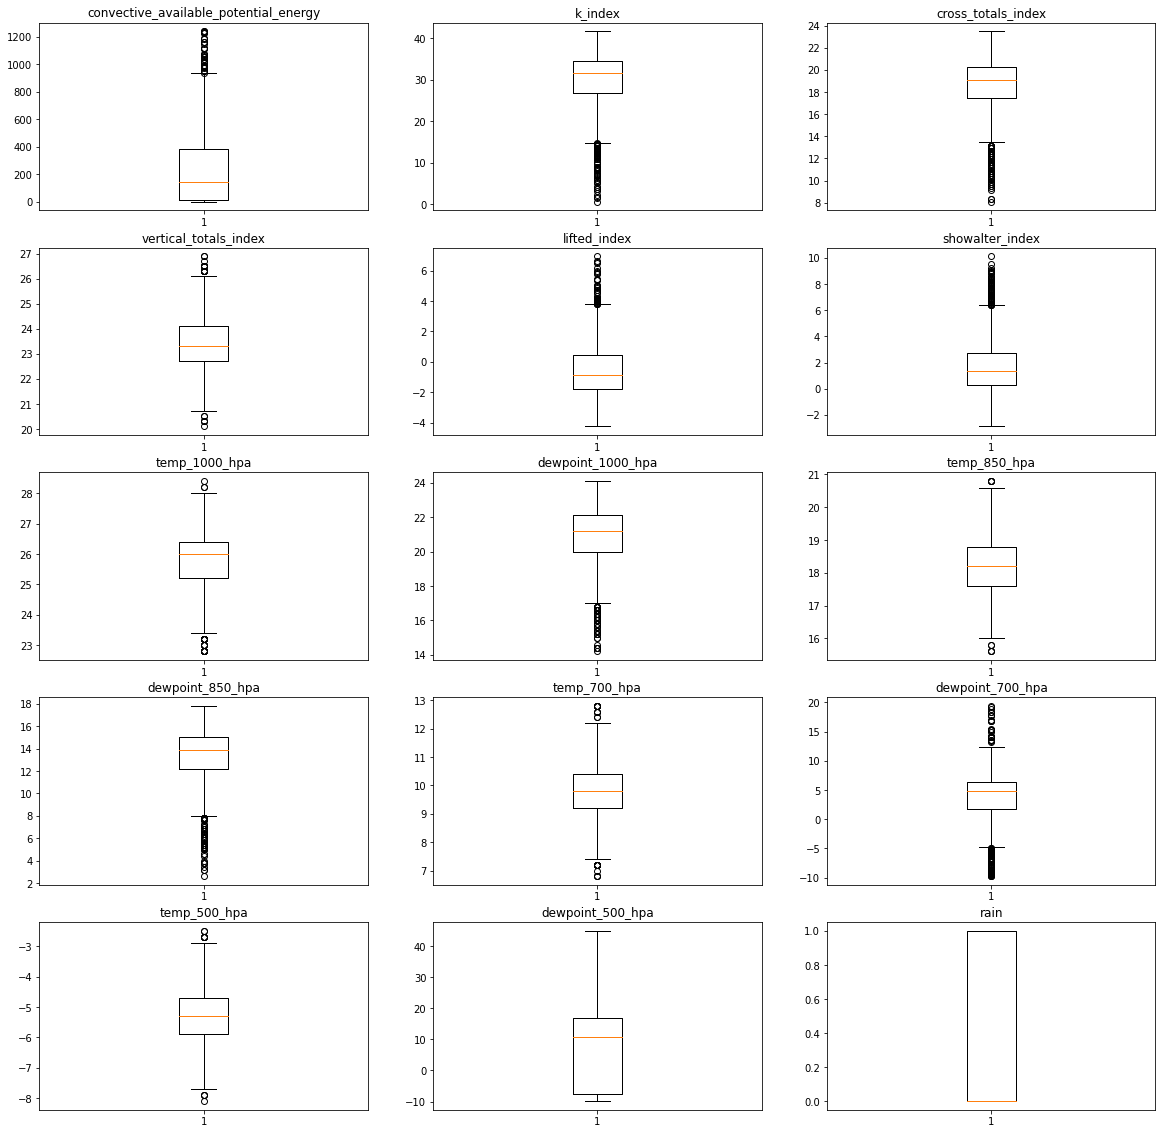

In [ ]:
fig, ax = plt.subplots(5, 3, figsize=(20,20))

var = df_rain.columns
var_index = 0
for row in range(5):
  for col in range(3):
    ax[row][col].boxplot(df_rain[var[var_index]])
    ax[row][col].title.set_text(var[var_index])
    # print('{},{} -> {}'.format(row, col, var[var_index]))
    var_index += 1
plt.show()

#### Statistics Description of Data

In [ ]:
df_rain.describe()

,convective_available_potential_energy,k_index,cross_totals_index,vertical_totals_index,lifted_index,showalter_index,temp_1000_hpa,dewpoint_1000_hpa,temp_850_hpa,dewpoint_850_hpa,temp_700_hpa,dewpoint_700_hpa,temp_500_hpa,dewpoint_500_hpa,rain
count,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,238.991079,29.696447,18.507039,23.455000,-0.486493,1.737125,25.820132,20.844342,18.211711,13.263750,9.796316,3.849539,-5.243289,6.944539,0.384211
std,274.183520,7.023695,2.532945,1.083299,1.829379,2.107841,0.995548,1.774394,0.859441,2.535727,1.002085,4.394489,0.924778,13.737467,0.486568
min,0.000000,0.700000,8.100000,20.100000,-4.250000,-2.890000,22.800000,14.200000,15.600000,2.600000,6.800000,-9.800000,-8.100000,-9.900000,0.000000
25%,10.855000,26.700000,17.500000,22.700000,-1.782500,0.300000,25.200000,20.000000,17.600000,12.200000,9.200000,1.800000,-5.900000,-7.600000,0.000000
50%,142.195000,31.700000,19.050000,23.300000,-0.840000,1.335000,26.000000,21.200000,18.200000,13.900000,9.800000,4.800000,-5.300000,10.900000,0.000000
75%,381.497500,34.600000,20.225000,24.100000,0.452500,2.742500,26.400000,22.100000,18.800000,15.000000,10.400000,6.300000,-4.700000,16.900000,1.000000
max,1240.840000,41.700000,23.500000,26.900000,6.950000,10.140000,28.400000,24.100000,20.800000,17.800000,12.800000,19.400000,-2.500000,44.900000,1.000000


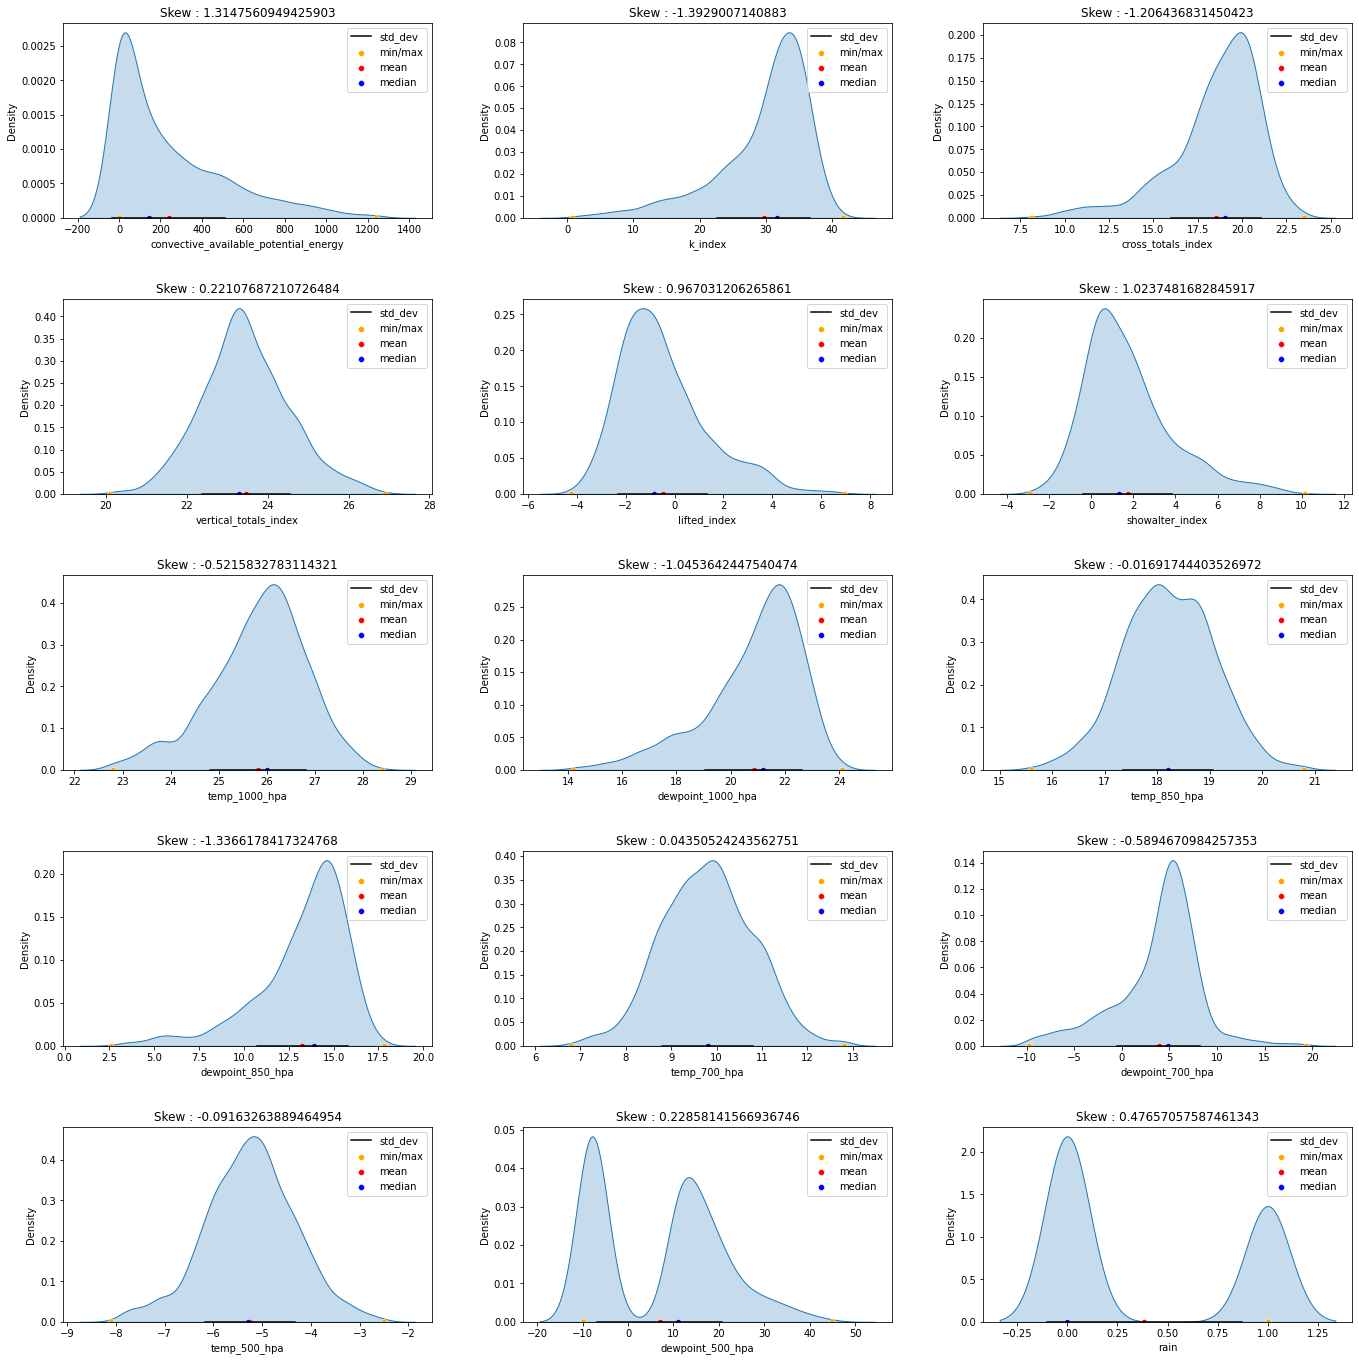

In [ ]:
fig, ax = plt.subplots(5, 3, figsize=(20,20))
fig.tight_layout(pad=6.0)

var = df_rain.columns
var_index = 0
for row in range(5):
  for col in range(3):
    sns.kdeplot(df_rain[var[var_index]], shade=True, ax=ax[row][col])
    points = df_rain[var[var_index]].describe()['mean']-df_rain[var[var_index]].describe()['std'], df_rain[var[var_index]].describe()['mean']+df_rain[var[var_index]].describe()['std']
    sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev", ax=ax[row][col])
    sns.scatterplot(x=df_rain[var[var_index]].describe()[['min','max']], y=[0,0], color = 'orange', label = "min/max", ax=ax[row][col])
    sns.scatterplot(x=df_rain[var[var_index]].mean(), y=[0], color = 'red', label = "mean", ax=ax[row][col])
    sns.scatterplot(x=df_rain[var[var_index]].median(), y=[0], color = 'blue', label = "median", ax=ax[row][col])
    ax[row][col].title.set_text('Skew : {}'.format(df_rain[var[var_index]].skew()))
    var_index += 1

In [ ]:
scaler = MinMaxScaler()
df_rain_scaled = pd.DataFrame(scaler.fit_transform(df_rain), columns=df_rain.columns)

columns = df_rain.columns
columns = columns[:-1]

mean_list_0 = []
for col in columns:
  mean_list_0.append(df_rain_scaled[df_rain_scaled.rain == 0][col].mean())

mean_list_1 = []
for col in columns:
  mean_list_1.append(df_rain_scaled[df_rain_scaled.rain == 1][col].mean())

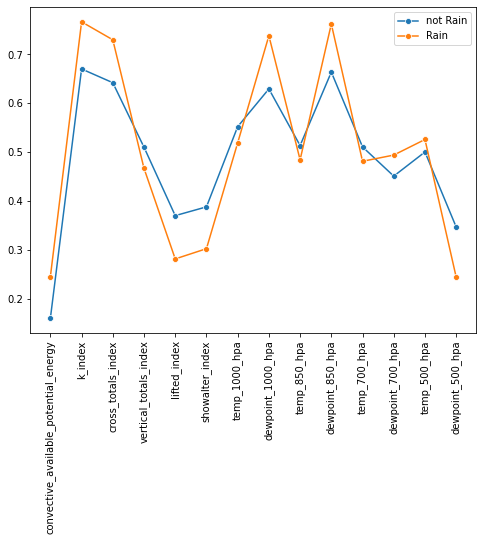

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=columns, y=mean_list_0,  marker="o", label='not Rain')
sns.lineplot(x=columns, y=mean_list_1,  marker="o", label='Rain')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

### Bivariate Analysis

#### Correlation Analysis

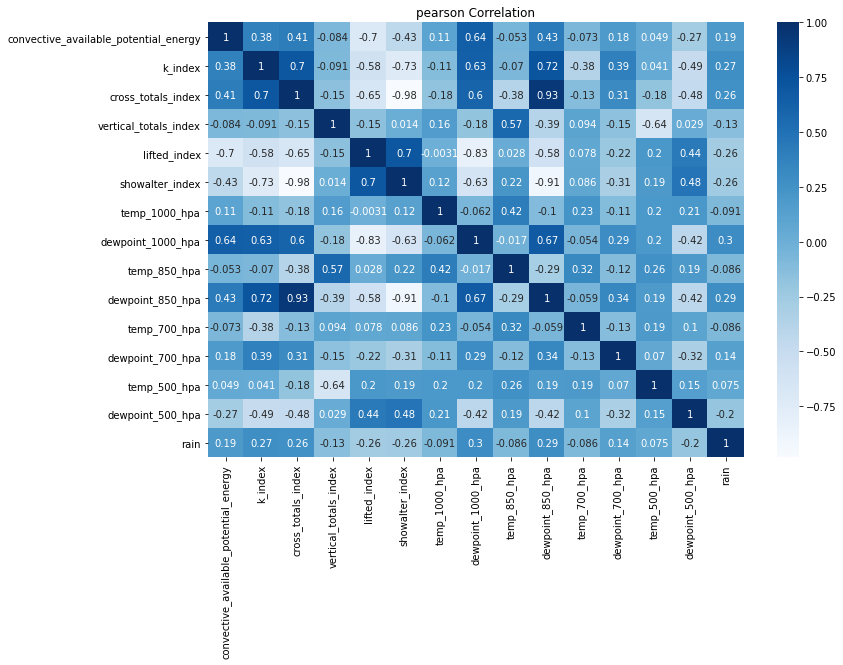

<Figure size 432x288 with 0 Axes>

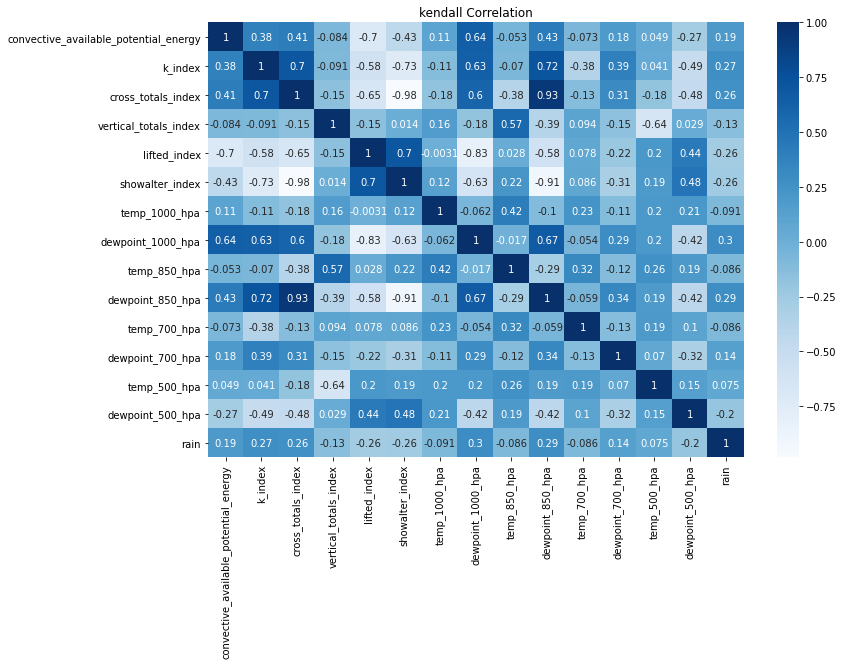

<Figure size 432x288 with 0 Axes>

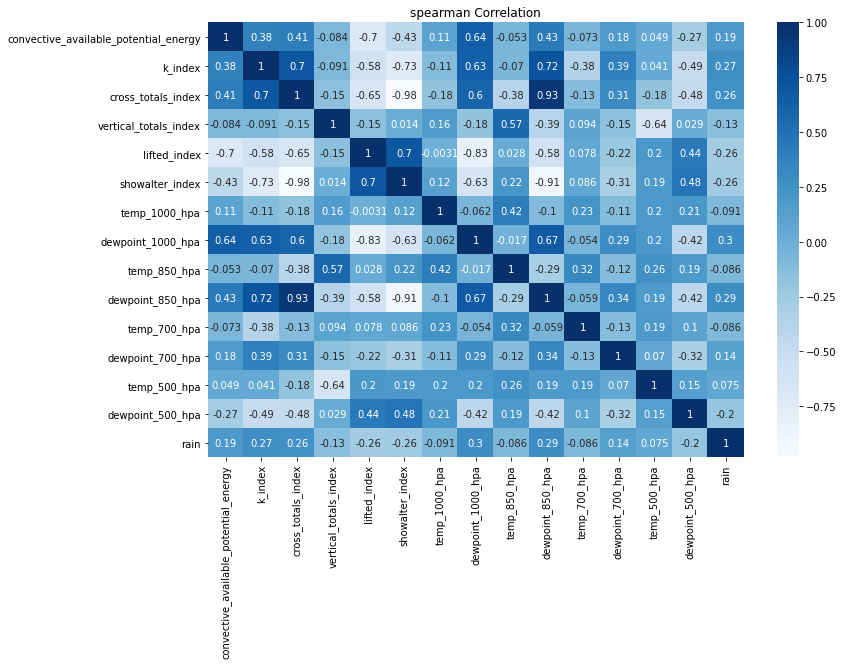

<Figure size 432x288 with 0 Axes>

In [ ]:
for method in ['pearson','kendall','spearman']:
  df_rain_corr = df_rain.corr(method='pearson')
  fig, ax = plt.subplots(figsize=(12,8))
  sns.heatmap(df_rain_corr, annot=True, cmap='Blues')
  plt.title('{} Correlation'.format(method))
  plt.figure()
  plt.show()

In [18]:
df_rain_corr.to_excel('/content/drive/MyDrive/Data Science/Self Project/Rain Prediction/corr.xlsx')

#### Variable Filtering

Variable Choosen Based on Correlation HeatMap (Pearson):
- dewpoint_1000_hpa
- vertical_totals_index
- temp_700_hpa
- temp_1000_hpa

In [22]:
df_filtered = df_rain_scaled[['dewpoint_1000_hpa', 'vertical_totals_index', 'temp_700_hpa', 'temp_1000_hpa', 'rain']]
df_filtered.head()

,dewpoint_1000_hpa,vertical_totals_index,temp_700_hpa,temp_1000_hpa,rain
0,0.808081,0.411765,0.566667,0.750000,0.0
1,0.939394,0.294118,0.700000,0.607143,0.0
2,0.797980,0.441176,0.366667,0.607143,0.0
3,0.898990,0.382353,0.566667,0.714286,0.0
4,0.646465,0.470588,0.600000,0.678571,0.0


#### Pairplot

<Figure size 432x288 with 0 Axes>

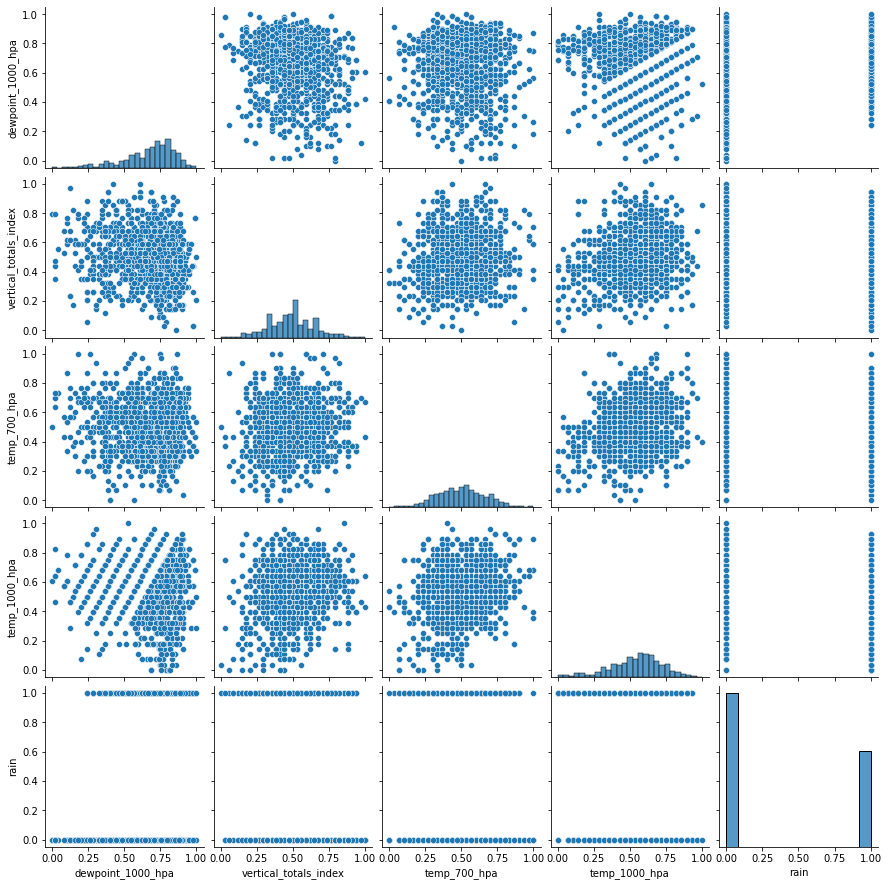

In [24]:
plt.figure()
sns.pairplot(df_filtered)
plt.show()

## **Data Preparation**

### Split Dataset

In [25]:
df_filtered.head()

,dewpoint_1000_hpa,vertical_totals_index,temp_700_hpa,temp_1000_hpa,rain
0,0.808081,0.411765,0.566667,0.750000,0.0
1,0.939394,0.294118,0.700000,0.607143,0.0
2,0.797980,0.441176,0.366667,0.607143,0.0
3,0.898990,0.382353,0.566667,0.714286,0.0
4,0.646465,0.470588,0.600000,0.678571,0.0


In [74]:
x = df_filtered.drop(columns=['rain'])
y = df_filtered['rain']

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3, stratify=y)
print('x_train : {}'.format(x_train.shape))
print('y_train : {}'.format(y_train.shape))
print()
print('x_test : {}'.format(x_test.shape))
print('y_test : {}'.format(y_test.shape))


x_train : (1064, 4)
y_train : (1064,)

x_test : (456, 4)
y_test : (456,)


### Modeling

#### Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

##### Parameter Tuning

In [80]:
dt_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2,10),
    'min_samples_split' : range(2,10),
    'min_samples_leaf' : range(2,5)
}

In [81]:
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=dt_param, refit=True)
dt_grid.fit(x_train, y_train)
print(dt_grid.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


##### Develop DT Model

In [83]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=2, min_samples_split=2)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [84]:
y_train_pred = dt_model.predict(x_train)

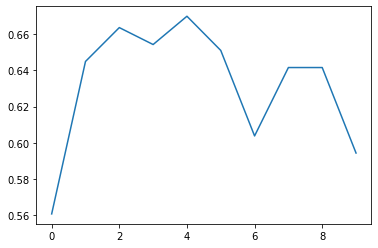

In [85]:
train_cv = cross_val_score(dt_model, x_train, y_train, cv=10)
sns.lineplot(x=range(len(train_cv)), y=train_cv)

In [86]:
print(classification_report(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.91      0.77       655
         1.0       0.65      0.27      0.38       409

    accuracy                           0.66      1064
   macro avg       0.66      0.59      0.58      1064
weighted avg       0.66      0.66      0.62      1064

0.6635338345864662


##### Evalute Model

In [87]:
y_test_pred = dt_model.predict(x_test)

In [88]:
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.85      0.73       281
         1.0       0.50      0.23      0.32       175

    accuracy                           0.62       456
   macro avg       0.57      0.54      0.53       456
weighted avg       0.59      0.62      0.57       456

0.6162280701754386


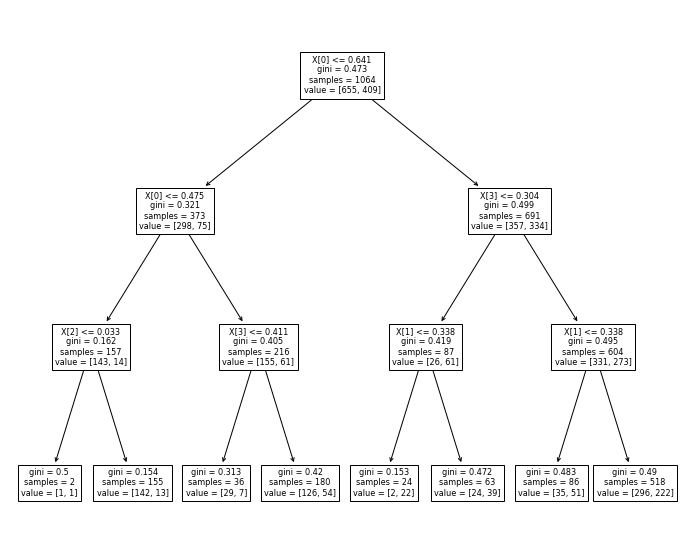

In [90]:
plt.figure(figsize=(12,10))
tree.plot_tree(dt_model)
plt.show()